<a href="https://colab.research.google.com/github/PriyadharsanVK/Speech-Emotion-Recognition-Model/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition Audio File.zip'

'/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition Audio File.zip'


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition Audio File.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition Audio File.zip
   creating: Actor_06/
  inflating: Actor_06/03-01-01-01-01-01-06.wav  
  inflating: Actor_06/03-01-01-01-01-02-06.wav  
  inflating: Actor_06/03-01-01-01-02-01-06.wav  
  inflating: Actor_06/03-01-01-01-02-02-06.wav  
  inflating: Actor_06/03-01-02-01-01-01-06.wav  
  inflating: Actor_06/03-01-02-01-01-02-06.wav  
  inflating: Actor_06/03-01-02-01-02-01-06.wav  
  inflating: Actor_06/03-01-02-01-02-02-06.wav  
  inflating: Actor_06/03-01-02-02-01-01-06.wav  
  inflating: Actor_06/03-01-02-02-01-02-06.wav  
  inflating: Actor_06/03-01-02-02-02-01-06.wav  
  inflating: Actor_06/03-01-02-02-02-02-06.wav  
  inflating: Actor_06/03-01-03-01-01-01-06.wav  
  inflating: Actor_06/03-01-03-01-01-02-06.wav  
  inflating: Actor_06/03-01-03-01-02-01-06.wav  
  inflating: Actor_06/03-01-03-01-02-02-06.wav  
  inflating: Actor_06/03-01-03-02-01-01-06.wav  
  inflating: Actor_06/03-01-03-02-01-02-06.wav  
  in

In [ ]:
!ls

Actor_01  Actor_04  Actor_07  Actor_10	Actor_13  Actor_16  Actor_19  Actor_22	drive
Actor_02  Actor_05  Actor_08  Actor_11	Actor_14  Actor_17  Actor_20  Actor_23	sample_data
Actor_03  Actor_06  Actor_09  Actor_12	Actor_15  Actor_18  Actor_21  Actor_24


In [ ]:
#Import All Important Libraries
from moviepy.editor import AudioFileClip
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

  if event.key is 'enter':



In [ ]:
def convert_mp3_to_wav(mp3_file, wav_file):
    audio_clip = AudioFileClip(mp3_file)
    audio_clip.write_audiofile(wav_file)
    audio_clip.close()

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    """
    Extract features from an audio file.

    Args:
        file_name (str): Path to the audio file.
        mfcc (bool): Whether to extract MFCC features.
        chroma (bool): Whether to extract chroma features.
        mel (bool): Whether to extract mel spectrogram features.

    Returns:
        np.ndarray: Extracted features.
    """
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        # If no features are selected, return an empty array
        if not mfcc and not chroma and not mel:
            return np.array([])

        result = np.array([])

        # Extract MFCC features
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = mfccs  # Initialize result with MFCCs if it's the first feature

        # Extract Chroma features
        if chroma:
            stft = np.abs(librosa.stft(X))
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            # Adjust lengths if needed
            if result.size != 0 and chroma.shape[0] != result.shape[0]:
                min_len = min(chroma.shape[0], result.shape[0])
                chroma = chroma[:min_len]
                result = result[:min_len]
            result = np.hstack((result, chroma))  # Concatenate chroma with result

        # Extract Mel spectrogram features
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            # Adjust lengths if needed
            if result.size != 0 and mel.shape[0] != result.shape[0]:
                min_len = min(mel.shape[0], result.shape[0])
                mel = mel[:min_len]
                result = result[:min_len]
            result = np.hstack((result, mel))  # Concatenate mel with result

    return result


In [ ]:
#Define the motions dictionary
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size = 0.2):
  x, y = [], []
  for folder in glob.glob('/content/Actor_*'):
    print(f"Processing folder: {folder}")  # Debug: Print folder name
    for file in glob.glob(folder + '/*.wav'):
      file_name = os.path.basename(file)
      emotion = emotions[file_name.split('-')[2]]
      print(f"Processing file: {file_name}, Emotion: {emotion}")  # Debug: Print file name and emotion
      if emotion not in observed_emotions:
        print(f"Skipping file: {file_name} (Emotion not observed)")  # Debug: Print reason for skipping
        continue
      feature = extract_feature(file, mfcc = True, chroma = True, mel = True)
      x.append(feature)
      y.append(emotion)
  print(f"Total samples loaded: {len(x)}")  # Debug: Print total samples loaded
  return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

Processing folder: /content/Actor_11
Processing file: 03-01-07-02-02-02-11.wav, Emotion: disgust
Processing file: 03-01-04-02-02-01-11.wav, Emotion: sad
Skipping file: 03-01-04-02-02-01-11.wav (Emotion not observed)
Processing file: 03-01-05-01-01-02-11.wav, Emotion: angry
Skipping file: 03-01-05-01-01-02-11.wav (Emotion not observed)
Processing file: 03-01-03-02-02-02-11.wav, Emotion: happy
Processing file: 03-01-01-01-01-02-11.wav, Emotion: neutral
Skipping file: 03-01-01-01-01-02-11.wav (Emotion not observed)
Processing file: 03-01-02-02-02-02-11.wav, Emotion: calm
Processing file: 03-01-05-02-01-02-11.wav, Emotion: angry
Skipping file: 03-01-05-02-01-02-11.wav (Emotion not observed)
Processing file: 03-01-06-02-02-01-11.wav, Emotion: fearful
Processing file: 03-01-03-01-01-02-11.wav, Emotion: happy
Processing file: 03-01-05-01-02-01-11.wav, Emotion: angry
Skipping file: 03-01-05-01-02-01-11.wav (Emotion not observed)
Processing file: 03-01-07-02-01-01-11.wav, Emotion: disgust
Proce

In [ ]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

(614, 154)
Features extracted: 48


In [ ]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)

In [ ]:
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred = model.predict(x_test)

In [ ]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 54.55%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  0  1  1]
 [13  7  5 12]
 [12  0 17 13]
 [ 6  0  7 18]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        calm       0.58      0.95      0.72        44
     disgust       1.00      0.19      0.32        37
     fearful       0.57      0.40      0.47        42
       happy       0.41      0.58      0.48        31

    accuracy                           0.55       154
   macro avg       0.64      0.53      0.50       154
weighted avg       0.64      0.55      0.51       154



In [ ]:
def predict_emotion(file_path, model):
    # Assuming 'extract_feature' function exists and returns expected features
    features = extract_feature(file_path, mfcc=True, chroma=True, mel=True)

    # Reshape to match the expected input shape for the model (num_samples, num_features)
    # We need to flatten the features if it's multi-dimensional
    features = features.flatten()

    # Reshape to match model's expected input shape
    # We use np.expand_dims to add a dimension for the number of samples (1)
    features = np.expand_dims(features, axis=0)

    # Check if the number of features matches the model's expected input shape
    if features.shape[1] != model.n_features_in_:
        # Calculate the number of samples needed to maintain original features
        num_samples = features.shape[1] // model.n_features_in_

        # Reshape the features to match the expected input shape for the model (num_samples, num_features)
        features = features.reshape(num_samples, model.n_features_in_)
    else:
        print(f"Warning: Feature mismatch! Expected {model.n_features_in_} features, got {features.shape[1]}")
        # If features size is not divisible by model's n_features_in_, we cannot reshape directly.
        # Instead of raising an error, we could consider truncating or padding the features
        # to make them divisible, or adjust the feature extraction process.

    predicted_emotion = model.predict(features)[0]
    print(f"\n\nThe Predicted Emotion is: {predicted_emotion}")

In [ ]:
mp3_file = '/content/drive/MyDrive/Colab Notebooks/jackhammer.mp3'  # Adjust path to your .mp3 file
wav_file = '/content/drive/MyDrive/Colab Notebooks/Test File/converted_audio.wav'
convert_mp3_to_wav(mp3_file, wav_file)
predict_emotion(wav_file, model)

MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/Test File/converted_audio.wav


  warnings.warn(



MoviePy - Done.


The Predicted Emotion is: calm


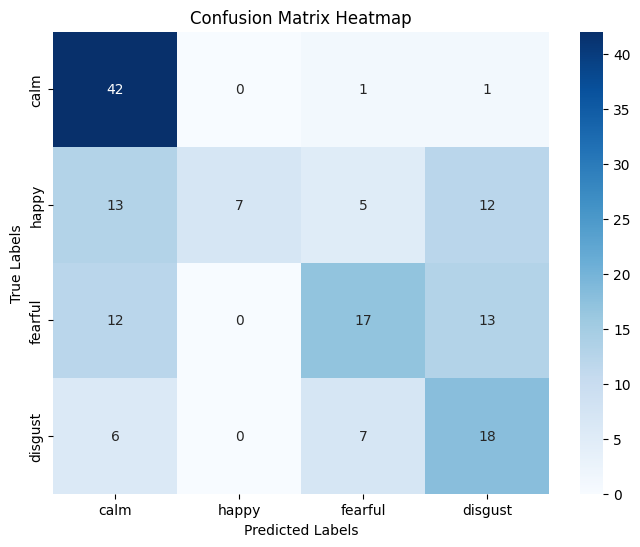

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=observed_emotions, yticklabels=observed_emotions)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

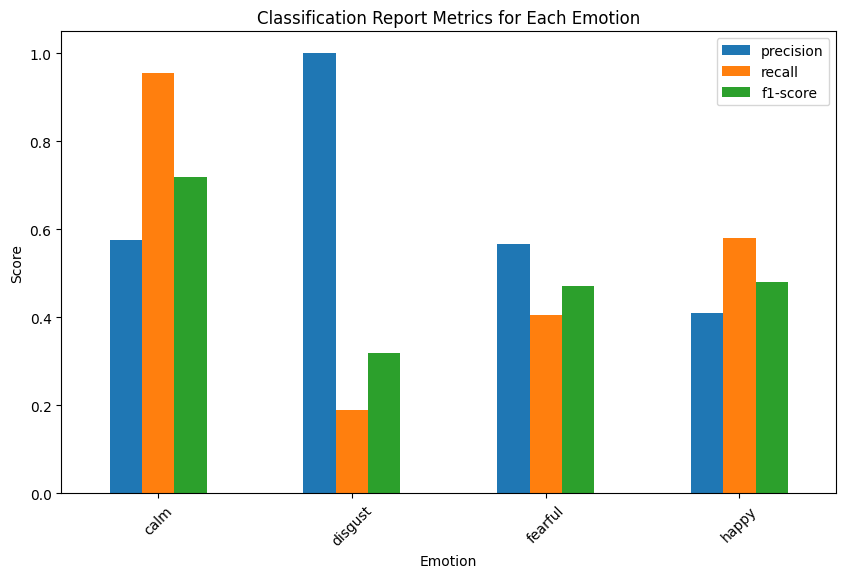

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting precision, recall, and f1-score for each class
df_report[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics for Each Emotion')
plt.ylabel('Score')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.show()